In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import nltk as nl
nl.download('vader_lexicon')
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lodor\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
data = pd.read_csv("kindle_reviews.csv")

data.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [3]:
data.describe()

,Unnamed: 0,overall,unixReviewTime
count,982619.000000,982619.000000,9.826190e+05
mean,491309.000000,4.347801,1.378183e+09
std,283657.816416,0.955056,2.298476e+07
min,0.000000,1.000000,9.522144e+08
25%,245654.500000,4.000000,1.365206e+09
50%,491309.000000,5.000000,1.383523e+09
75%,736963.500000,5.000000,1.396051e+09
max,982618.000000,5.000000,1.406074e+09


In [4]:
data.shape

(982619, 10)

In [5]:
print(data.dtypes)

Unnamed: 0         int64
asin              object
helpful           object
overall            int64
reviewText        object
reviewTime        object
reviewerID        object
reviewerName      object
summary           object
unixReviewTime     int64
dtype: object


In [6]:
data['reviewTime'] = pd.to_datetime(data['reviewTime'])
data['reviewText'] = data['reviewText'].astype(str)
data['summary'] = data['summary'].astype(str)
data.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,2014-05-05,A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,2014-01-06,AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,2014-04-04,A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,2014-02-19,A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...",2014-03-19,A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [15]:
np.any(data.isnull())

True

<AxesSubplot:title={'center':'Amazon Reviews Overtime'}, xlabel='Year', ylabel='Review Count'>

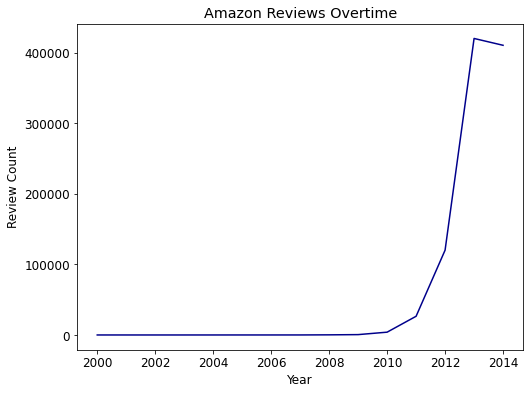

In [53]:
data["year"] = data.reviewTime.dt.year
data.Year.value_counts().sort_index().plot(x = "year", color="darkblue",figsize=(8,6),
                                           title="Amazon Reviews Overtime", fontsize= 12,
                                          ylabel = "Review Count",
                                          xlabel = "Year")

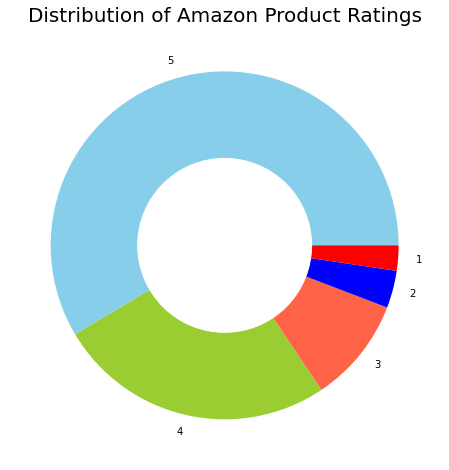

In [18]:
ratings = data["overall"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()

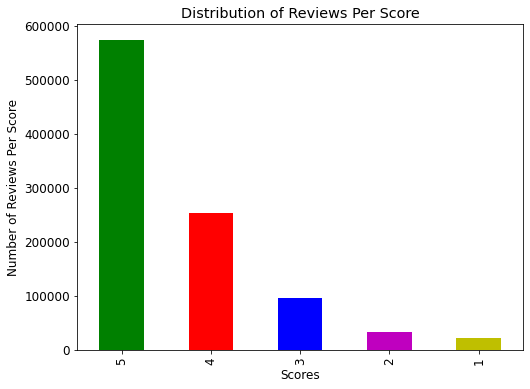

In [39]:
rating = data['overall'].value_counts()

plt.figure(figsize=(8,6))
my_colors = ['g', 'r', 'b', 'm', 'y']
rating.plot(kind='bar', color=my_colors)
plt.xlabel("Scores")
plt.ylabel("Number of Reviews Per Score")
plt.title("Distribution of Reviews Per Score")
plt.show()

In [7]:
#give reviews with Score > 3 a positive rating and reviews with a score < 3 a negative rating
def partition(x):
    if x < 4:
        return 'Negative'
    else:
        return 'Positive'

actualScore = data['overall']
pos_neg = actualScore.map(partition)
data['overall'] = pos_neg

data.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",Positive,I enjoy vintage books and movies so I enjoyed ...,2014-05-05,A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",Positive,This book is a reissue of an old one; the auth...,2014-01-06,AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",Positive,This was a fairly interesting read. It had ol...,2014-04-04,A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",Positive,I'd never read any of the Amy Brewster mysteri...,2014-02-19,A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",Positive,"If you like period pieces - clothing, lingo, y...",2014-03-19,A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


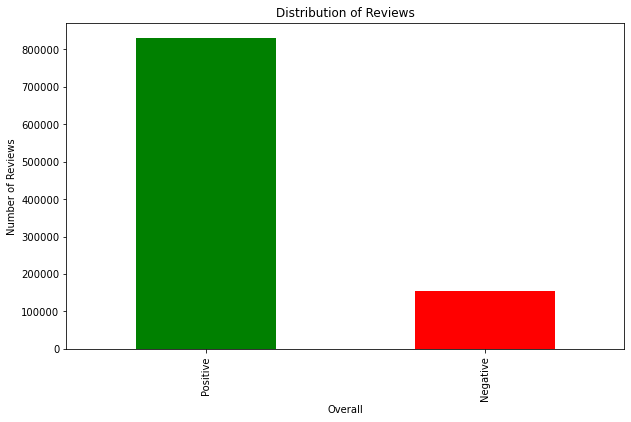

In [10]:
category_dist = data['overall'].value_counts()

plt.figure(figsize=(10,6))
my_colors = ['g', 'r']
category_dist.plot(kind='bar', color=my_colors)
plt.xlabel("Overall")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Reviews")
plt.show()